In [9]:
import requests
import json

latitude - szerokość - góra/dół na mapie
longitude - długość - prawo/lewo na mapie

In [10]:
"""cell to visualize the bounding box on a map"""""

import folium

# Create a map centered around Warsaw
map = folium.Map(location=[52.2297, 21.0122], zoom_start=10)

# Define the bounding box as a list of coordinates
bbox = [[52.0, 20.5], [53.0, 21.5]]

# Draw a rectangle on the map to represent the bounding box
folium.Rectangle(
    bounds=bbox,
    fill=False,
    color='red'
).add_to(map)

# Display the map
#map


## parameters to search

In [11]:
collection = 'Sentinel2'
bbox = '20.50,52.00,21.50,53.00'
start_date = '2022-02-23T00:00:00Z'
end_date = '2022-03-23T23:59:59Z'
max_records = 50


response = requests.get('https://finder.creodias.eu/resto/api/collections/Sentinel2/search.json?maxRecords=50&bbox=20.50,52.00,21.50,53.00&startDate=2022-02-23T00:00:00Z&completionDate=2022-03-23T23:59:59Z')

In [12]:
response_dict = response.json()
save_to_file = None # insert path to file here if want to save the response to a file

if save_to_file:
    with open (save_to_file, 'w') as f:
        json.dump(response.json(), f, indent=4)

In [13]:
# properties of the first feature
response_dict["features"][0]["properties"]


{'collection': 'SENTINEL-2',
 'status': 'ONLINE',
 'license': {'licenseId': 'unlicensed',
  'hasToBeSigned': 'never',
  'grantedCountries': None,
  'grantedOrganizationCountries': None,
  'grantedFlags': None,
  'viewService': 'public',
  'signatureQuota': -1,
  'description': {'shortName': 'No license'}},
 'productIdentifier': '/eodata/Sentinel-2/MSI/L1C/2022/03/18/S2B_MSIL1C_20220318T080649_N0400_R078_T41XMC_20220318T083217.SAFE',
 'parentIdentifier': None,
 'title': 'S2B_MSIL1C_20220318T080649_N0400_R078_T41XMC_20220318T083217.SAFE',
 'description': None,
 'organisationName': 'ESA',
 'startDate': '2022-03-18T08:06:49.024Z',
 'completionDate': '2022-03-18T08:06:49.024Z',
 'productType': 'S2MSI1C',
 'processingLevel': 'S2MSI1C',
 'platform': 'S2B',
 'instrument': 'MSI',
 'resolution': 60.0,
 'sensorMode': 'INS-NOBS',
 'orbitNumber': 26273,
 'quicklook': None,
 'thumbnail': 'https://finder.creodias.eu/files/Sentinel-2/MSI/L1C/2022/03/18/S2B_MSIL1C_20220318T080649_N0400_R078_T41XMC_2022

In [14]:
img_path = response_dict["features"][0]["properties"]["thumbnail"]

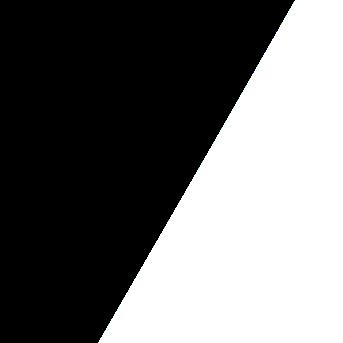

In [15]:
# dwonload the image
img = requests.get(img_path)
# plot the image
from IPython.display import Image
Image(img.content)
